# Problem Statement
Congratulations – you have been hired as Chief Data Scientist of MedCamp – a not for profit organization dedicated in making health conditions for **working professionals** better. MedCamp was started because the founders saw their family suffer due to **bad work life balance and neglected health**.

MedCamp organizes health camps in **several cities** with low work life balance. They reach out to working people and ask them to register for these health camps. For those who attend, MedCamp provides them facility to **undergo health checks** or increase awareness by **visiting various stalls** (depending on the format of camp). 

MedCamp has conducted 65 such events over a period of 4 years and they see a **high drop off between “Registration” and Number of people taking tests at the Camps.** In last 4 years, they have stored data of ~110,000 registrations they have done.

One of the **huge costs** in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience.

 

**The Process:**
MedCamp employees / volunteers reach out to people and drive registrations.
During the camp, People who “ShowUp” either undergo the medical tests or visit stalls depending on the format of health camp.
 

**Other things to note:**
* Since this is a completely voluntary activity for the working professionals, MedCamp usually has little profile information about these people.
* For a few camps, there was hardware failure, so some information about date and time of registration is lost.
* MedCamp runs 3 formats of these camps. The first and second format provides people with an instantaneous health score. The third format provides information about several health issues through various awareness stalls.

**Favorable outcome:**
* For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.
* **You need to predict the chances (probability) of having a favourable outcome.**

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [182]:
pd.set_option('display.max_columns',None)

In [183]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submmission.csv')

In [184]:
#Import the additional files for the Dataset

fhc=pd.read_csv('First_Health_Camp_Attended.csv')
shc=pd.read_csv('Second_Health_Camp_Attended.csv')
thc=pd.read_csv('Third_Health_Camp_Attended.csv')
hc=pd.read_csv('Health_Camp_Detail.csv')
pp=pd.read_csv('Patient_Profile.csv')

In [185]:
train.shape, test.shape,submission.shape,fhc.shape,shc.shape,thc.shape,hc.shape,pp.shape

((75278, 8),
 (35249, 8),
 (35249, 3),
 (6218, 5),
 (7819, 3),
 (6515, 4),
 (65, 6),
 (37633, 11))

In [186]:
print(fhc.columns),print(shc.columns),print(thc.columns),print(hc.columns),print(pp.columns)

Index(['Patient_ID', 'Health_Camp_ID', 'Donation', 'Health_Score',
       'Unnamed: 4'],
      dtype='object')
Index(['Patient_ID', 'Health_Camp_ID', 'Health Score'], dtype='object')
Index(['Patient_ID', 'Health_Camp_ID', 'Number_of_stall_visited',
       'Last_Stall_Visited_Number'],
      dtype='object')
Index(['Health_Camp_ID', 'Camp_Start_Date', 'Camp_End_Date', 'Category1',
       'Category2', 'Category3'],
      dtype='object')
Index(['Patient_ID', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category'],
      dtype='object')


(None, None, None, None, None)

In [187]:
#Lets combine the Train and Test
combined=pd.concat([train,test],ignore_index=True)

In [188]:
combined.shape

(110527, 8)

In [189]:
#Lets join the patient profile to the combined dataset 
combined=pd.merge(combined,pp,on=['Patient_ID'],how='left')

In [190]:
#Combine the health camps with the dataset
combined=pd.merge(combined,fhc, on=['Patient_ID', 'Health_Camp_ID'],how='left')
combined=pd.merge(combined,shc, on=['Patient_ID', 'Health_Camp_ID'],how='left')
combined=pd.merge(combined,thc, on=['Patient_ID', 'Health_Camp_ID'],how='left')

In [191]:
combined.shape

(110527, 24)

In [192]:
#Combine the dataset with health camp details
combined=pd.merge(combined,hc, on=['Health_Camp_ID'],how='left')

In [193]:
combined.shape

(110527, 29)

In [194]:
del pp,fhc,shc,thc,hc

In [195]:
#Preview the data
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,10-Sep-05,4,0,0,0,2,0,0,0,0,None,None,None,06-Dec-04,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,16-Aug-05,14-Oct-05,Third,G,2
1,507246,6578,18-Aug-05,45,5,0,0,7,0,0,0,0,1,75,40,08-Sep-04,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2
2,523729,6534,29-Apr-06,0,0,0,0,0,0,0,0,0,None,None,None,22-Jun-04,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2
3,524931,6535,07-Feb-04,0,0,0,0,0,0,0,0,0,None,None,None,07-Feb-04,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-Feb-04,18-Feb-04,First,E,2
4,521364,6529,28-Feb-06,15,1,0,0,7,0,0,0,1,1,70,40,04-Jul-03,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,30-Mar-06,03-Apr-06,Second,A,2


In [196]:
combined.replace(to_replace='None',value=np.nan,inplace=True)

In [197]:
combined.isnull().sum()

Patient_ID                        0
Health_Camp_ID                    0
Registration_Date               334
Var1                              0
Var2                              0
Var3                              0
Var4                              0
Var5                              0
Online_Follower                   0
LinkedIn_Shared                   0
Twitter_Shared                    0
Facebook_Shared                   0
Income                        81342
Education_Score               98167
Age                           77925
First_Interaction                 0
City_Type                     46602
Employer_Category             90963
Donation                     104309
Health_Score                 104309
Unnamed: 4                   110527
Health Score                 102708
Number_of_stall_visited      104012
Last_Stall_Visited_Number    104012
Camp_Start_Date                   0
Camp_End_Date                     0
Category1                         0
Category2                   

In [198]:
combined['Social_Media']=combined.Online_Follower+combined.LinkedIn_Shared+\
combined.Twitter_Shared+combined.Facebook_Shared

In [199]:
#Registration Date

combined['Registration_Date']=pd.to_datetime(combined.Registration_Date,dayfirst=True)
combined['First_Interaction']=pd.to_datetime(combined.First_Interaction,dayfirst=True)
combined['Camp_Start_Date']=pd.to_datetime(combined.Camp_Start_Date,dayfirst=True)
combined['Camp_End_Date']=pd.to_datetime(combined.Camp_End_Date,dayfirst=True)

In [200]:
#Diff in interaction dates
combined['Interaction_Days']=combined.Registration_Date-combined.First_Interaction

In [201]:
#remove days from the new variable
#combined.Interaction_Days.apply(lambda x: str(x)[:-14])
combined['Interaction_Days']=combined.Interaction_Days.dt.days

In [202]:
#Camp Duration
combined['Camp_Duration']=(combined.Camp_End_Date-combined.Camp_Start_Date).dt.days

In [203]:
##Registration wait Days
combined['magic1']=(np.abs(combined.Camp_Start_Date-combined.Registration_Date).dt.days)

In [204]:
#Total_available_days
combined['magic2']=(np.abs(combined.Camp_End_Date-combined.Registration_Date).dt.days)

In [205]:
#Total Patient Interaction Duration
combined['Patient_Duration']=(np.abs(combined.Camp_End_Date-combined.First_Interaction).dt.days)

In [208]:
#First_interaction ---> Registration ---> Camp is organised ---> Patient visits --->
# Health camp ---> Health score else stall visit....
#First_Interaction Date---->RegistrationDate---->CampDate
# Camp End date-->Camp Start Date-->Registration Date

def dates_between(start,reg,end):
    if (end>start>reg):
        return 1
    else:
        return 0

In [209]:
#Apply the function
combined['dates_seq']=combined.apply(lambda x: dates_between(x['Camp_Start_Date'],x['Registration_Date'],x['Camp_End_Date']),axis=1)

In [210]:
combined['Registration_Day']=combined.Registration_Date.dt.day
combined['Registration_Month']=combined.Registration_Date.dt.month
combined['Registration_Year']=combined.Registration_Date.dt.year
combined['Camp_Start_Year']=combined.Camp_Start_Date.dt.year
combined['Camp_End_Year']=combined.Camp_End_Date.dt.year
combined['First_Interaction_Year']=combined.First_Interaction.dt.year

In [211]:
#No of Patients per day
combined['Patients_Per_Day']=combined.groupby('Registration_Day')['Patient_ID'].transform('nunique')

#No of Patients per Month
combined['Patients_Per_Month']=combined.groupby('Registration_Month')['Patient_ID'].transform('nunique')

#No of Patients per Year
combined['Patients_Per_Year']=combined.groupby('Registration_Year')['Patient_ID'].transform('nunique')

In [212]:
#no of day of Visits by a patients
combined['Patient_Frequency_Per_Day']=combined.groupby('Patient_ID')['Registration_Day'].transform('nunique')

#no of months of Visits by a patients
combined['Patient_Frequency_Per_Month']=combined.groupby('Patient_ID')['Registration_Month'].transform('nunique')

#no of year of Visits by a patients
combined['Patient_Frequency_Per_Year']=combined.groupby('Patient_ID')['Registration_Year'].transform('nunique')

In [213]:
combined.groupby('Patient_ID')['Registration_Day'].transform('nunique')

0          9
1         16
2          5
3          4
4         17
          ..
110522    17
110523     3
110524    10
110525     4
110526    10
Name: Registration_Day, Length: 110527, dtype: int64

In [222]:
combined.loc[:2,:]

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq,Registration_Day,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Interaction_Year,Patients_Per_Day,Patients_Per_Month,Patients_Per_Year,Patient_Frequency_Per_Day,Patient_Frequency_Per_Month,Patient_Frequency_Per_Year,Patient_Freq_in_HC
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312,0,10.0,9.0,2005.0,2005,2005,2004,2649.0,6585.0,15710.0,9,7,3,2837
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344.0,59,2.0,57.0,401,0,18.0,8.0,2005.0,2005,2005,2004,3620.0,5804.0,15710.0,16,12,4,2837
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,0,676.0,751,194.0,557.0,1233,0,29.0,4.0,2006.0,2005,2007,2004,2518.0,4785.0,19318.0,5,4,2,3597


<AxesSubplot:xlabel='Patient_ID'>

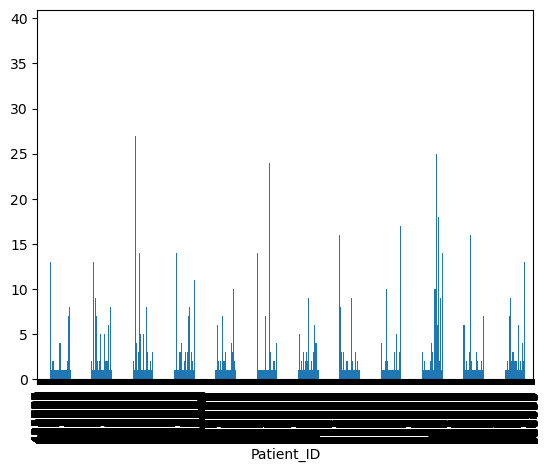

In [224]:
combined.groupby('Patient_ID')['Registration_Day'].count().plot(kind='bar')

In [216]:
#No of Patients in Health Camps
combined['Patient_Freq_in_HC']=combined.groupby('Health_Camp_ID')['Patient_ID'].transform('nunique')

In [225]:
#No. of Health Camps
combined['HC_Per_Year']=combined.groupby('Camp_End_Year')['Health_Camp_ID'].transform('nunique')

In [226]:
#If the Health_Score>0 or Health Score>0 or Num of stall Visited>0
#Return 0 else 1
def target(hs,hs_,stall_visit,stall_no):
    if ((hs>0) or (hs_>0) or (stall_visit>0) or (stall_no>0)):
        return 1
    else:
        return 0

In [228]:
combined['Target']=combined.apply(lambda x:target(x['Health_Score'],x['Health Score'],
                               x['Number_of_stall_visited'],x['Last_Stall_Visited_Number']),
              axis=1)

In [229]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq,Registration_Day,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Interaction_Year,Patients_Per_Day,Patients_Per_Month,Patients_Per_Year,Patient_Frequency_Per_Day,Patient_Frequency_Per_Month,Patient_Frequency_Per_Year,Patient_Freq_in_HC,HC_Per_Year,Target
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312,0,10.0,9.0,2005.0,2005,2005,2004,2649.0,6585.0,15710.0,9,7,3,2837,19,1
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344.0,59,2.0,57.0,401,0,18.0,8.0,2005.0,2005,2005,2004,3620.0,5804.0,15710.0,16,12,4,2837,19,0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,0,676.0,751,194.0,557.0,1233,0,29.0,4.0,2006.0,2005,2007,2004,2518.0,4785.0,19318.0,5,4,2,3597,9,1
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0,0.0,17,6.0,11.0,11,0,7.0,2.0,2004.0,2004,2004,2004,2363.0,5029.0,9646.0,4,4,3,1882,14,0
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,1,970.0,4,30.0,34.0,1004,1,28.0,2.0,2006.0,2006,2006,2003,3012.0,5029.0,19318.0,17,9,4,3823,18,1


In [230]:
#Check the count of the Target
combined.Target.value_counts()

0    89993
1    20534
Name: Target, dtype: int64

In [233]:
pd.Series(np.where(combined.loc[:,['Health_Score','Health Score','Number_of_stall_visited'
                         ,'Last_Stall_Visited_Number']].isnull().sum(axis=1)==4,0,1)).value_counts()

0    89975
1    20552
dtype: int64

In [236]:
#Drop the columns ~ patientID, healthcampID, registrationDate, SocialMediaColumns, 
#All the Dates, unnamed4

newdata=combined.drop(['Patient_ID', 'Health_Camp_ID', 'Registration_Date',
                      'Online_Follower', 'LinkedIn_Shared','Twitter_Shared',
        'Facebook_Shared', 'First_Interaction','Unnamed: 4',
                       'Camp_Start_Date', 'Camp_End_Date'],axis=1)

In [237]:
newdata.shape

(110527, 40)

In [244]:
#Apply Frequency Encoding on Cat1, cat2, cat3
newdata['Category1']=pd.factorize(newdata.Category1)[0]
newdata['Category2']=pd.factorize(newdata.Category2)[0]
newdata['Category3']=pd.factorize(newdata.Category3)[0]

In [246]:
#We drop the donation column
newdata.drop('Donation',axis=1,inplace=True)

In [247]:
#replace Income, Education and Age None to np.nan

In [249]:
#Drop the additional columns
newdata.drop(columns=['Health_Score','Health Score','Number_of_stall_visited',
                     'Last_Stall_Visited_Number'],inplace=True)

In [251]:
newdata['Income']=pd.factorize(newdata.Income)[0]
newdata['Education_Score']=pd.factorize(newdata.Education_Score)[0]
newdata['City_Type']=pd.factorize(newdata.City_Type)[0]
newdata['Employer_Category']=pd.factorize(newdata.Employer_Category)[0]

In [258]:
_,p,_,_=stats.chi2_contingency(pd.crosstab(newdata.Employer_Category,newdata.Target))
p

1.806276255115288e-173

In [ ]:
#Tip use KBins Discretizer to deal with Numerical Data

In [260]:
newdata['Age']=newdata.Age.astype('float')

In [261]:
newdata.Age.describe()

count    32602.000000
mean        48.208760
std         11.969104
min         30.000000
25%         40.000000
50%         44.000000
75%         51.000000
max         80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

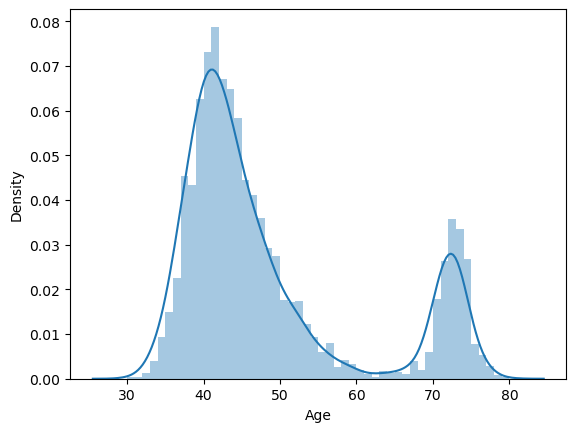

In [262]:
#Plot the Age
sns.distplot(newdata.Age)

In [264]:
newdata['Age']=pd.factorize(newdata.Age)[0]

In [266]:
_,p,_,_=stats.chi2_contingency(pd.crosstab(newdata.Age,newdata.Target))
p

3.905829591677621e-210

In [267]:
newdata.dropna().shape

(110193, 35)

In [273]:
for i in newdata.columns:
    newdata[i]=np.where(newdata[i].isnull(),newdata[i].median(),newdata[i])

In [276]:
newdata.magic1.describe()

count    110527.000000
mean         66.812752
std          95.426873
min           0.000000
25%           7.000000
50%          32.000000
75%          71.000000
max         500.000000
Name: magic1, dtype: float64

## Modelling

In [278]:
#Split the Data in train and test
newtrain=newdata.loc[0:train.shape[0]-1,:]
newtest=newdata.loc[train.shape[0]:,:]

In [279]:
#Drop the Target from train and test
X=newtrain.drop('Target',axis=1)
newtest=newtest.drop('Target',axis=1)
y=newtrain.Target

In [282]:
#Import the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [286]:
#Define the base models

def base_models():
    models=dict()
    models['lg']=LogisticRegression()
    models['dt']=DecisionTreeClassifier()
    models['rf']=RandomForestClassifier(criterion='entropy')
    models['gbm']=GradientBoostingClassifier()
    models['xgb']=XGBClassifier()
    models['lgbm']=LGBMClassifier()
    models['catboost']=CatBoostClassifier()
    models['naivebayes']=GaussianNB()
    return models


In [287]:
#Evaluation Function.....
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score,StratifiedKFold

def eval_score(model):
    cv1=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score=cross_val_score(model,X,y,
                         scoring='roc_auc',cv=cv1,
                         error_score='raise', n_jobs=-1)
    return score

In [288]:
#Build the models....
models=base_models()


result, names =list(), list()
for name, model in models.items():
    finalscore=eval_score(model)
    result.append(finalscore)
    names.append(name)
    print('%s %.3f (%.3f)'%(name,np.mean(result),np.std(result)))

lg 0.697 (0.005)
dt 0.715 (0.019)
rf 0.773 (0.084)
gbm 0.796 (0.083)
xgb 0.812 (0.081)
lgbm 0.823 (0.078)
catboost 0.831 (0.075)
naivebayes 0.822 (0.074)


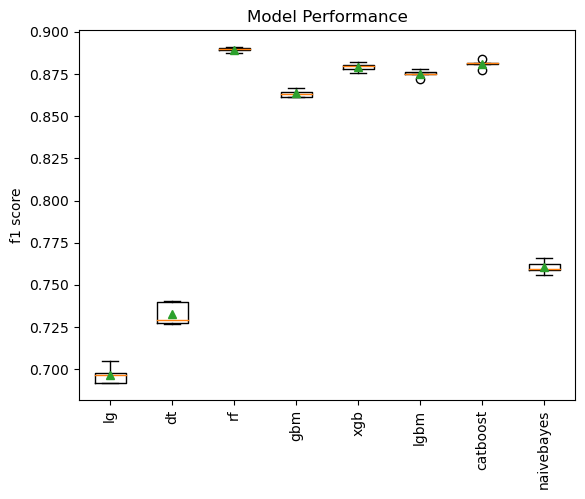

In [290]:
plt.boxplot(result,labels=names,showmeans=True)
plt.xticks(rotation=90)
plt.ylabel('f1 score')
plt.title('Model Performance')
plt.show()

In [293]:
#Lets start with xgboost

xgb=XGBClassifier()

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_xgb=[]
for train_index, test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_xgb.append(xgb.fit(xtrain,ytrain).predict_proba(newtest))

In [295]:
#Generate the prdicted Values...
submission['Outcome']=pd.DataFrame(np.array(pred_xgb)[0])[1]     #0.757

In [296]:
submission.to_csv('XGBModel_health.csv',index=False)

In [297]:
#Lets go with LGBMClassifier

lgbm=LGBMClassifier()

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_lgbm=[]
for train_index, test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_lgbm.append(lgbm.fit(xtrain,ytrain).predict_proba(newtest))
    
#Generate the prdicted Values...
submission['Outcome']=pd.DataFrame(np.array(pred_lgbm)[0])[1]

submission.to_csv('LGBMModel_health.csv',index=False)      #0.777

In [298]:
#Lets go with LGBMClassifier

cboost=CatBoostClassifier()

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_catboost=[]
for train_index, test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_catboost.append(cboost.fit(xtrain,ytrain).predict_proba(newtest))
    
#Generate the prdicted Values...
submission['Outcome']=pd.DataFrame(np.array(pred_catboost)[0])[1]

submission.to_csv('CatBoostModel_health.csv',index=False)  #0.769

Learning rate set to 0.059277
0:	learn: 0.6561768	total: 219ms	remaining: 3m 39s
1:	learn: 0.6231738	total: 274ms	remaining: 2m 16s
2:	learn: 0.5945063	total: 317ms	remaining: 1m 45s
3:	learn: 0.5709637	total: 358ms	remaining: 1m 29s
4:	learn: 0.5505123	total: 397ms	remaining: 1m 19s
5:	learn: 0.5342724	total: 449ms	remaining: 1m 14s
6:	learn: 0.5195186	total: 490ms	remaining: 1m 9s
7:	learn: 0.5052493	total: 528ms	remaining: 1m 5s
8:	learn: 0.4939882	total: 563ms	remaining: 1m 1s
9:	learn: 0.4847831	total: 600ms	remaining: 59.4s
10:	learn: 0.4767637	total: 638ms	remaining: 57.3s
11:	learn: 0.4689340	total: 695ms	remaining: 57.3s
12:	learn: 0.4627280	total: 736ms	remaining: 55.9s
13:	learn: 0.4569818	total: 777ms	remaining: 54.8s
14:	learn: 0.4519141	total: 816ms	remaining: 53.6s
15:	learn: 0.4463378	total: 863ms	remaining: 53.1s
16:	learn: 0.4421968	total: 919ms	remaining: 53.1s
17:	learn: 0.4383737	total: 978ms	remaining: 53.4s
18:	learn: 0.4357747	total: 1.01s	remaining: 52.5s
19:	l

162:	learn: 0.3857110	total: 11.1s	remaining: 56.8s
163:	learn: 0.3856214	total: 11.1s	remaining: 56.7s
164:	learn: 0.3854882	total: 11.2s	remaining: 56.4s
165:	learn: 0.3853338	total: 11.2s	remaining: 56.3s
166:	learn: 0.3852350	total: 11.3s	remaining: 56.2s
167:	learn: 0.3851526	total: 11.3s	remaining: 56.1s
168:	learn: 0.3850656	total: 11.4s	remaining: 55.9s
169:	learn: 0.3849899	total: 11.4s	remaining: 55.7s
170:	learn: 0.3848871	total: 11.5s	remaining: 55.6s
171:	learn: 0.3848044	total: 11.5s	remaining: 55.4s
172:	learn: 0.3846718	total: 11.6s	remaining: 55.4s
173:	learn: 0.3845861	total: 11.6s	remaining: 55.3s
174:	learn: 0.3844750	total: 11.7s	remaining: 55.1s
175:	learn: 0.3843395	total: 11.7s	remaining: 55s
176:	learn: 0.3841853	total: 11.8s	remaining: 54.9s
177:	learn: 0.3840941	total: 11.9s	remaining: 54.8s
178:	learn: 0.3839742	total: 11.9s	remaining: 54.7s
179:	learn: 0.3838597	total: 12s	remaining: 54.6s
180:	learn: 0.3837848	total: 12s	remaining: 54.4s
181:	learn: 0.3837

322:	learn: 0.3693417	total: 19.9s	remaining: 41.7s
323:	learn: 0.3692125	total: 19.9s	remaining: 41.6s
324:	learn: 0.3691120	total: 20s	remaining: 41.5s
325:	learn: 0.3690566	total: 20.1s	remaining: 41.5s
326:	learn: 0.3689587	total: 20.2s	remaining: 41.5s
327:	learn: 0.3688542	total: 20.2s	remaining: 41.5s
328:	learn: 0.3687484	total: 20.3s	remaining: 41.4s
329:	learn: 0.3686397	total: 20.3s	remaining: 41.3s
330:	learn: 0.3685719	total: 20.4s	remaining: 41.2s
331:	learn: 0.3684439	total: 20.4s	remaining: 41.1s
332:	learn: 0.3683583	total: 20.6s	remaining: 41.2s
333:	learn: 0.3682508	total: 20.6s	remaining: 41.2s
334:	learn: 0.3681472	total: 20.7s	remaining: 41.1s
335:	learn: 0.3680348	total: 20.7s	remaining: 41s
336:	learn: 0.3679007	total: 20.8s	remaining: 40.9s
337:	learn: 0.3678303	total: 20.8s	remaining: 40.8s
338:	learn: 0.3677153	total: 20.9s	remaining: 40.7s
339:	learn: 0.3676331	total: 21s	remaining: 40.7s
340:	learn: 0.3675486	total: 21s	remaining: 40.7s
341:	learn: 0.367499

483:	learn: 0.3560959	total: 28.3s	remaining: 30.1s
484:	learn: 0.3560809	total: 28.3s	remaining: 30.1s
485:	learn: 0.3559667	total: 28.4s	remaining: 30s
486:	learn: 0.3558868	total: 28.5s	remaining: 30s
487:	learn: 0.3558212	total: 28.6s	remaining: 30s
488:	learn: 0.3557309	total: 28.6s	remaining: 29.9s
489:	learn: 0.3556622	total: 28.7s	remaining: 29.8s
490:	learn: 0.3555966	total: 28.7s	remaining: 29.7s
491:	learn: 0.3554849	total: 28.7s	remaining: 29.7s
492:	learn: 0.3553940	total: 28.8s	remaining: 29.7s
493:	learn: 0.3553005	total: 28.9s	remaining: 29.6s
494:	learn: 0.3552355	total: 29s	remaining: 29.6s
495:	learn: 0.3551292	total: 29.1s	remaining: 29.5s
496:	learn: 0.3550842	total: 29.1s	remaining: 29.5s
497:	learn: 0.3550202	total: 29.1s	remaining: 29.4s
498:	learn: 0.3549165	total: 29.2s	remaining: 29.3s
499:	learn: 0.3548448	total: 29.2s	remaining: 29.2s
500:	learn: 0.3547883	total: 29.3s	remaining: 29.2s
501:	learn: 0.3547078	total: 29.4s	remaining: 29.2s
502:	learn: 0.354643

643:	learn: 0.3455105	total: 36.1s	remaining: 20s
644:	learn: 0.3454735	total: 36.2s	remaining: 19.9s
645:	learn: 0.3453857	total: 36.3s	remaining: 19.9s
646:	learn: 0.3453363	total: 36.5s	remaining: 19.9s
647:	learn: 0.3452620	total: 36.6s	remaining: 19.9s
648:	learn: 0.3451832	total: 36.6s	remaining: 19.8s
649:	learn: 0.3451271	total: 36.7s	remaining: 19.7s
650:	learn: 0.3450904	total: 36.7s	remaining: 19.7s
651:	learn: 0.3450188	total: 36.8s	remaining: 19.6s
652:	learn: 0.3449475	total: 36.8s	remaining: 19.6s
653:	learn: 0.3448685	total: 36.8s	remaining: 19.5s
654:	learn: 0.3448118	total: 36.9s	remaining: 19.4s
655:	learn: 0.3447239	total: 36.9s	remaining: 19.4s
656:	learn: 0.3446678	total: 37s	remaining: 19.3s
657:	learn: 0.3445909	total: 37s	remaining: 19.2s
658:	learn: 0.3445459	total: 37s	remaining: 19.2s
659:	learn: 0.3444655	total: 37.1s	remaining: 19.1s
660:	learn: 0.3443725	total: 37.1s	remaining: 19s
661:	learn: 0.3442951	total: 37.2s	remaining: 19s
662:	learn: 0.3442457	to

806:	learn: 0.3355649	total: 43.5s	remaining: 10.4s
807:	learn: 0.3355144	total: 43.5s	remaining: 10.3s
808:	learn: 0.3354846	total: 43.6s	remaining: 10.3s
809:	learn: 0.3354407	total: 43.6s	remaining: 10.2s
810:	learn: 0.3353623	total: 43.7s	remaining: 10.2s
811:	learn: 0.3353207	total: 43.7s	remaining: 10.1s
812:	learn: 0.3352439	total: 43.7s	remaining: 10.1s
813:	learn: 0.3352108	total: 43.8s	remaining: 10s
814:	learn: 0.3351535	total: 43.8s	remaining: 9.95s
815:	learn: 0.3350847	total: 43.9s	remaining: 9.89s
816:	learn: 0.3350215	total: 43.9s	remaining: 9.84s
817:	learn: 0.3349691	total: 44s	remaining: 9.78s
818:	learn: 0.3349127	total: 44s	remaining: 9.73s
819:	learn: 0.3348498	total: 44s	remaining: 9.67s
820:	learn: 0.3348016	total: 44.1s	remaining: 9.61s
821:	learn: 0.3347857	total: 44.1s	remaining: 9.55s
822:	learn: 0.3347305	total: 44.2s	remaining: 9.5s
823:	learn: 0.3346661	total: 44.2s	remaining: 9.45s
824:	learn: 0.3346074	total: 44.3s	remaining: 9.39s
825:	learn: 0.3345592

970:	learn: 0.3264294	total: 50.3s	remaining: 1.5s
971:	learn: 0.3263380	total: 50.4s	remaining: 1.45s
972:	learn: 0.3262837	total: 50.4s	remaining: 1.4s
973:	learn: 0.3262479	total: 50.4s	remaining: 1.35s
974:	learn: 0.3261889	total: 50.5s	remaining: 1.29s
975:	learn: 0.3261244	total: 50.5s	remaining: 1.24s
976:	learn: 0.3260707	total: 50.6s	remaining: 1.19s
977:	learn: 0.3260496	total: 50.6s	remaining: 1.14s
978:	learn: 0.3259745	total: 50.7s	remaining: 1.09s
979:	learn: 0.3259203	total: 50.7s	remaining: 1.03s
980:	learn: 0.3258673	total: 50.7s	remaining: 982ms
981:	learn: 0.3258334	total: 50.8s	remaining: 930ms
982:	learn: 0.3257662	total: 50.8s	remaining: 879ms
983:	learn: 0.3257167	total: 50.9s	remaining: 827ms
984:	learn: 0.3256507	total: 50.9s	remaining: 775ms
985:	learn: 0.3255947	total: 50.9s	remaining: 723ms
986:	learn: 0.3255530	total: 51s	remaining: 671ms
987:	learn: 0.3255193	total: 51s	remaining: 620ms
988:	learn: 0.3254744	total: 51.1s	remaining: 568ms
989:	learn: 0.3254

130:	learn: 0.3901115	total: 6.62s	remaining: 43.9s
131:	learn: 0.3900178	total: 6.73s	remaining: 44.3s
132:	learn: 0.3898874	total: 6.79s	remaining: 44.3s
133:	learn: 0.3897411	total: 6.87s	remaining: 44.4s
134:	learn: 0.3896066	total: 6.97s	remaining: 44.7s
135:	learn: 0.3894678	total: 7.15s	remaining: 45.4s
136:	learn: 0.3893349	total: 7.27s	remaining: 45.8s
137:	learn: 0.3893189	total: 7.35s	remaining: 45.9s
138:	learn: 0.3892439	total: 7.43s	remaining: 46s
139:	learn: 0.3891306	total: 7.51s	remaining: 46.1s
140:	learn: 0.3889957	total: 7.58s	remaining: 46.2s
141:	learn: 0.3888680	total: 7.67s	remaining: 46.3s
142:	learn: 0.3887958	total: 7.75s	remaining: 46.4s
143:	learn: 0.3887025	total: 7.84s	remaining: 46.6s
144:	learn: 0.3885616	total: 7.92s	remaining: 46.7s
145:	learn: 0.3884073	total: 8s	remaining: 46.8s
146:	learn: 0.3883358	total: 8.06s	remaining: 46.8s
147:	learn: 0.3882319	total: 8.13s	remaining: 46.8s
148:	learn: 0.3880897	total: 8.22s	remaining: 46.9s
149:	learn: 0.388

293:	learn: 0.3719164	total: 16.4s	remaining: 39.3s
294:	learn: 0.3718198	total: 16.4s	remaining: 39.2s
295:	learn: 0.3717048	total: 16.4s	remaining: 39.1s
296:	learn: 0.3716023	total: 16.5s	remaining: 39s
297:	learn: 0.3715128	total: 16.5s	remaining: 38.9s
298:	learn: 0.3714446	total: 16.5s	remaining: 38.8s
299:	learn: 0.3713509	total: 16.6s	remaining: 38.7s
300:	learn: 0.3712325	total: 16.6s	remaining: 38.6s
301:	learn: 0.3711529	total: 16.7s	remaining: 38.5s
302:	learn: 0.3710701	total: 16.7s	remaining: 38.4s
303:	learn: 0.3709733	total: 16.7s	remaining: 38.3s
304:	learn: 0.3708676	total: 16.8s	remaining: 38.2s
305:	learn: 0.3707971	total: 16.8s	remaining: 38.1s
306:	learn: 0.3707216	total: 16.9s	remaining: 38s
307:	learn: 0.3706078	total: 16.9s	remaining: 38s
308:	learn: 0.3705057	total: 16.9s	remaining: 37.9s
309:	learn: 0.3704070	total: 17s	remaining: 37.8s
310:	learn: 0.3703272	total: 17s	remaining: 37.7s
311:	learn: 0.3702627	total: 17.1s	remaining: 37.6s
312:	learn: 0.3701763	

454:	learn: 0.3584087	total: 25.5s	remaining: 30.5s
455:	learn: 0.3583094	total: 25.5s	remaining: 30.5s
456:	learn: 0.3582327	total: 25.6s	remaining: 30.4s
457:	learn: 0.3581426	total: 25.6s	remaining: 30.3s
458:	learn: 0.3580638	total: 25.7s	remaining: 30.2s
459:	learn: 0.3580116	total: 25.7s	remaining: 30.2s
460:	learn: 0.3579421	total: 25.7s	remaining: 30.1s
461:	learn: 0.3577921	total: 25.8s	remaining: 30s
462:	learn: 0.3577550	total: 25.9s	remaining: 30s
463:	learn: 0.3576833	total: 26s	remaining: 30s
464:	learn: 0.3576215	total: 26s	remaining: 29.9s
465:	learn: 0.3575594	total: 26.1s	remaining: 29.9s
466:	learn: 0.3574615	total: 26.1s	remaining: 29.8s
467:	learn: 0.3573322	total: 26.2s	remaining: 29.7s
468:	learn: 0.3572599	total: 26.2s	remaining: 29.7s
469:	learn: 0.3571608	total: 26.3s	remaining: 29.6s
470:	learn: 0.3571294	total: 26.3s	remaining: 29.5s
471:	learn: 0.3570354	total: 26.4s	remaining: 29.5s
472:	learn: 0.3569219	total: 26.4s	remaining: 29.4s
473:	learn: 0.3568458	

616:	learn: 0.3466120	total: 34.1s	remaining: 21.2s
617:	learn: 0.3466072	total: 34.1s	remaining: 21.1s
618:	learn: 0.3465217	total: 34.2s	remaining: 21s
619:	learn: 0.3464692	total: 34.2s	remaining: 21s
620:	learn: 0.3464344	total: 34.2s	remaining: 20.9s
621:	learn: 0.3463850	total: 34.3s	remaining: 20.8s
622:	learn: 0.3463055	total: 34.3s	remaining: 20.8s
623:	learn: 0.3462691	total: 34.4s	remaining: 20.7s
624:	learn: 0.3461885	total: 34.4s	remaining: 20.6s
625:	learn: 0.3461456	total: 34.4s	remaining: 20.6s
626:	learn: 0.3460728	total: 34.5s	remaining: 20.5s
627:	learn: 0.3460292	total: 34.5s	remaining: 20.4s
628:	learn: 0.3459575	total: 34.6s	remaining: 20.4s
629:	learn: 0.3459183	total: 34.6s	remaining: 20.3s
630:	learn: 0.3458632	total: 34.6s	remaining: 20.3s
631:	learn: 0.3457979	total: 34.7s	remaining: 20.2s
632:	learn: 0.3457244	total: 34.7s	remaining: 20.1s
633:	learn: 0.3456469	total: 34.8s	remaining: 20.1s
634:	learn: 0.3456048	total: 34.8s	remaining: 20s
635:	learn: 0.3455

778:	learn: 0.3367572	total: 41.3s	remaining: 11.7s
779:	learn: 0.3367125	total: 41.4s	remaining: 11.7s
780:	learn: 0.3366519	total: 41.4s	remaining: 11.6s
781:	learn: 0.3366113	total: 41.4s	remaining: 11.6s
782:	learn: 0.3365504	total: 41.5s	remaining: 11.5s
783:	learn: 0.3365057	total: 41.5s	remaining: 11.4s
784:	learn: 0.3364369	total: 41.6s	remaining: 11.4s
785:	learn: 0.3363959	total: 41.6s	remaining: 11.3s
786:	learn: 0.3363327	total: 41.7s	remaining: 11.3s
787:	learn: 0.3362888	total: 41.7s	remaining: 11.2s
788:	learn: 0.3362401	total: 41.8s	remaining: 11.2s
789:	learn: 0.3361761	total: 41.8s	remaining: 11.1s
790:	learn: 0.3361200	total: 41.9s	remaining: 11.1s
791:	learn: 0.3360698	total: 41.9s	remaining: 11s
792:	learn: 0.3360134	total: 41.9s	remaining: 10.9s
793:	learn: 0.3359757	total: 42s	remaining: 10.9s
794:	learn: 0.3359344	total: 42s	remaining: 10.8s
795:	learn: 0.3358559	total: 42.1s	remaining: 10.8s
796:	learn: 0.3357808	total: 42.1s	remaining: 10.7s
797:	learn: 0.3357

940:	learn: 0.3274694	total: 48.5s	remaining: 3.04s
941:	learn: 0.3274349	total: 48.5s	remaining: 2.99s
942:	learn: 0.3273735	total: 48.6s	remaining: 2.94s
943:	learn: 0.3273408	total: 48.7s	remaining: 2.89s
944:	learn: 0.3272877	total: 48.7s	remaining: 2.83s
945:	learn: 0.3272106	total: 48.8s	remaining: 2.78s
946:	learn: 0.3271685	total: 48.8s	remaining: 2.73s
947:	learn: 0.3271116	total: 48.9s	remaining: 2.68s
948:	learn: 0.3270480	total: 48.9s	remaining: 2.63s
949:	learn: 0.3270154	total: 48.9s	remaining: 2.58s
950:	learn: 0.3269476	total: 49s	remaining: 2.52s
951:	learn: 0.3268823	total: 49s	remaining: 2.47s
952:	learn: 0.3268289	total: 49.1s	remaining: 2.42s
953:	learn: 0.3267578	total: 49.1s	remaining: 2.37s
954:	learn: 0.3267141	total: 49.1s	remaining: 2.31s
955:	learn: 0.3266831	total: 49.2s	remaining: 2.26s
956:	learn: 0.3266410	total: 49.2s	remaining: 2.21s
957:	learn: 0.3265721	total: 49.3s	remaining: 2.16s
958:	learn: 0.3265385	total: 49.3s	remaining: 2.11s
959:	learn: 0.32

101:	learn: 0.3954447	total: 4.56s	remaining: 40.1s
102:	learn: 0.3952071	total: 4.62s	remaining: 40.3s
103:	learn: 0.3950605	total: 4.67s	remaining: 40.3s
104:	learn: 0.3949208	total: 4.73s	remaining: 40.3s
105:	learn: 0.3947469	total: 4.8s	remaining: 40.5s
106:	learn: 0.3946079	total: 4.87s	remaining: 40.6s
107:	learn: 0.3944340	total: 4.92s	remaining: 40.6s
108:	learn: 0.3942820	total: 4.96s	remaining: 40.6s
109:	learn: 0.3941225	total: 5.01s	remaining: 40.6s
110:	learn: 0.3940192	total: 5.08s	remaining: 40.6s
111:	learn: 0.3938998	total: 5.14s	remaining: 40.7s
112:	learn: 0.3937675	total: 5.2s	remaining: 40.8s
113:	learn: 0.3932906	total: 5.26s	remaining: 40.9s
114:	learn: 0.3932026	total: 5.3s	remaining: 40.8s
115:	learn: 0.3930420	total: 5.36s	remaining: 40.9s
116:	learn: 0.3929208	total: 5.42s	remaining: 40.9s
117:	learn: 0.3927840	total: 5.48s	remaining: 41s
118:	learn: 0.3926775	total: 5.61s	remaining: 41.5s
119:	learn: 0.3925790	total: 5.67s	remaining: 41.6s
120:	learn: 0.392

262:	learn: 0.3765998	total: 13.5s	remaining: 37.7s
263:	learn: 0.3764772	total: 13.6s	remaining: 37.9s
264:	learn: 0.3763890	total: 13.7s	remaining: 38s
265:	learn: 0.3762927	total: 13.8s	remaining: 38s
266:	learn: 0.3762206	total: 13.8s	remaining: 37.9s
267:	learn: 0.3762059	total: 13.8s	remaining: 37.8s
268:	learn: 0.3761864	total: 13.9s	remaining: 37.7s
269:	learn: 0.3760810	total: 14s	remaining: 37.9s
270:	learn: 0.3760108	total: 14.1s	remaining: 37.9s
271:	learn: 0.3758637	total: 14.2s	remaining: 37.9s
272:	learn: 0.3757449	total: 14.2s	remaining: 37.9s
273:	learn: 0.3756104	total: 14.3s	remaining: 38s
274:	learn: 0.3754538	total: 14.4s	remaining: 38s
275:	learn: 0.3753577	total: 14.5s	remaining: 38s
276:	learn: 0.3752631	total: 14.5s	remaining: 37.9s
277:	learn: 0.3751637	total: 14.6s	remaining: 37.8s
278:	learn: 0.3750649	total: 14.6s	remaining: 37.8s
279:	learn: 0.3749283	total: 14.7s	remaining: 37.8s
280:	learn: 0.3748040	total: 14.8s	remaining: 37.9s
281:	learn: 0.3746926	to

425:	learn: 0.3621875	total: 23.5s	remaining: 31.7s
426:	learn: 0.3620983	total: 23.6s	remaining: 31.6s
427:	learn: 0.3620042	total: 23.6s	remaining: 31.6s
428:	learn: 0.3619901	total: 23.6s	remaining: 31.5s
429:	learn: 0.3618930	total: 23.7s	remaining: 31.4s
430:	learn: 0.3618301	total: 23.7s	remaining: 31.3s
431:	learn: 0.3617488	total: 23.8s	remaining: 31.3s
432:	learn: 0.3616618	total: 23.8s	remaining: 31.2s
433:	learn: 0.3615717	total: 23.9s	remaining: 31.1s
434:	learn: 0.3615045	total: 23.9s	remaining: 31s
435:	learn: 0.3613742	total: 23.9s	remaining: 31s
436:	learn: 0.3613042	total: 24s	remaining: 30.9s
437:	learn: 0.3612120	total: 24s	remaining: 30.8s
438:	learn: 0.3611256	total: 24.1s	remaining: 30.8s
439:	learn: 0.3610556	total: 24.1s	remaining: 30.7s
440:	learn: 0.3610214	total: 24.1s	remaining: 30.6s
441:	learn: 0.3609602	total: 24.2s	remaining: 30.5s
442:	learn: 0.3609109	total: 24.2s	remaining: 30.4s
443:	learn: 0.3607700	total: 24.3s	remaining: 30.4s
444:	learn: 0.360652

584:	learn: 0.3504207	total: 30.9s	remaining: 21.9s
585:	learn: 0.3503700	total: 31s	remaining: 21.9s
586:	learn: 0.3502640	total: 31s	remaining: 21.8s
587:	learn: 0.3501746	total: 31.1s	remaining: 21.8s
588:	learn: 0.3501004	total: 31.1s	remaining: 21.7s
589:	learn: 0.3500292	total: 31.1s	remaining: 21.6s
590:	learn: 0.3499655	total: 31.2s	remaining: 21.6s
591:	learn: 0.3498869	total: 31.2s	remaining: 21.5s
592:	learn: 0.3498018	total: 31.3s	remaining: 21.5s
593:	learn: 0.3497403	total: 31.3s	remaining: 21.4s
594:	learn: 0.3496728	total: 31.3s	remaining: 21.3s
595:	learn: 0.3495841	total: 31.4s	remaining: 21.3s
596:	learn: 0.3495010	total: 31.4s	remaining: 21.2s
597:	learn: 0.3494417	total: 31.5s	remaining: 21.2s
598:	learn: 0.3493515	total: 31.5s	remaining: 21.1s
599:	learn: 0.3492713	total: 31.6s	remaining: 21s
600:	learn: 0.3492024	total: 31.6s	remaining: 21s
601:	learn: 0.3491423	total: 31.7s	remaining: 21s
602:	learn: 0.3490991	total: 31.7s	remaining: 20.9s
603:	learn: 0.3490349	

744:	learn: 0.3399025	total: 38.6s	remaining: 13.2s
745:	learn: 0.3398489	total: 38.6s	remaining: 13.2s
746:	learn: 0.3397752	total: 38.7s	remaining: 13.1s
747:	learn: 0.3397426	total: 38.7s	remaining: 13s
748:	learn: 0.3396865	total: 38.8s	remaining: 13s
749:	learn: 0.3396133	total: 38.8s	remaining: 12.9s
750:	learn: 0.3395708	total: 38.8s	remaining: 12.9s
751:	learn: 0.3395194	total: 38.9s	remaining: 12.8s
752:	learn: 0.3394478	total: 38.9s	remaining: 12.8s
753:	learn: 0.3393874	total: 39s	remaining: 12.7s
754:	learn: 0.3393365	total: 39s	remaining: 12.7s
755:	learn: 0.3392606	total: 39s	remaining: 12.6s
756:	learn: 0.3392281	total: 39.1s	remaining: 12.5s
757:	learn: 0.3391698	total: 39.1s	remaining: 12.5s
758:	learn: 0.3391187	total: 39.2s	remaining: 12.4s
759:	learn: 0.3390687	total: 39.2s	remaining: 12.4s
760:	learn: 0.3390051	total: 39.2s	remaining: 12.3s
761:	learn: 0.3389295	total: 39.3s	remaining: 12.3s
762:	learn: 0.3388863	total: 39.3s	remaining: 12.2s
763:	learn: 0.3388102	

907:	learn: 0.3307248	total: 46.1s	remaining: 4.67s
908:	learn: 0.3306675	total: 46.1s	remaining: 4.62s
909:	learn: 0.3306206	total: 46.2s	remaining: 4.57s
910:	learn: 0.3305525	total: 46.2s	remaining: 4.51s
911:	learn: 0.3304923	total: 46.3s	remaining: 4.46s
912:	learn: 0.3304593	total: 46.3s	remaining: 4.41s
913:	learn: 0.3303863	total: 46.3s	remaining: 4.36s
914:	learn: 0.3303377	total: 46.4s	remaining: 4.31s
915:	learn: 0.3302640	total: 46.4s	remaining: 4.26s
916:	learn: 0.3302233	total: 46.4s	remaining: 4.2s
917:	learn: 0.3301785	total: 46.5s	remaining: 4.15s
918:	learn: 0.3301309	total: 46.5s	remaining: 4.1s
919:	learn: 0.3300571	total: 46.6s	remaining: 4.05s
920:	learn: 0.3299988	total: 46.6s	remaining: 4s
921:	learn: 0.3299476	total: 46.7s	remaining: 3.95s
922:	learn: 0.3298976	total: 46.7s	remaining: 3.9s
923:	learn: 0.3298100	total: 46.8s	remaining: 3.85s
924:	learn: 0.3297544	total: 46.8s	remaining: 3.79s
925:	learn: 0.3297263	total: 46.8s	remaining: 3.74s
926:	learn: 0.3296

66:	learn: 0.4015433	total: 6.18s	remaining: 1m 26s
67:	learn: 0.4012229	total: 6.28s	remaining: 1m 26s
68:	learn: 0.4010251	total: 6.34s	remaining: 1m 25s
69:	learn: 0.4007805	total: 6.4s	remaining: 1m 25s
70:	learn: 0.4005297	total: 6.48s	remaining: 1m 24s
71:	learn: 0.4003348	total: 6.53s	remaining: 1m 24s
72:	learn: 0.4001239	total: 6.59s	remaining: 1m 23s
73:	learn: 0.3998333	total: 6.67s	remaining: 1m 23s
74:	learn: 0.3996282	total: 6.73s	remaining: 1m 22s
75:	learn: 0.3994396	total: 6.79s	remaining: 1m 22s
76:	learn: 0.3992617	total: 6.86s	remaining: 1m 22s
77:	learn: 0.3990258	total: 6.95s	remaining: 1m 22s
78:	learn: 0.3986976	total: 7.03s	remaining: 1m 21s
79:	learn: 0.3982617	total: 7.1s	remaining: 1m 21s
80:	learn: 0.3981119	total: 7.16s	remaining: 1m 21s
81:	learn: 0.3977735	total: 7.23s	remaining: 1m 20s
82:	learn: 0.3976450	total: 7.29s	remaining: 1m 20s
83:	learn: 0.3973946	total: 7.35s	remaining: 1m 20s
84:	learn: 0.3972738	total: 7.41s	remaining: 1m 19s
85:	learn: 0.3

225:	learn: 0.3788266	total: 14.7s	remaining: 50.4s
226:	learn: 0.3786789	total: 14.8s	remaining: 50.3s
227:	learn: 0.3785814	total: 14.8s	remaining: 50.2s
228:	learn: 0.3784395	total: 14.9s	remaining: 50.1s
229:	learn: 0.3782793	total: 14.9s	remaining: 49.9s
230:	learn: 0.3781882	total: 14.9s	remaining: 49.8s
231:	learn: 0.3780762	total: 15s	remaining: 49.6s
232:	learn: 0.3779553	total: 15s	remaining: 49.5s
233:	learn: 0.3778190	total: 15.1s	remaining: 49.3s
234:	learn: 0.3776977	total: 15.1s	remaining: 49.2s
235:	learn: 0.3775931	total: 15.1s	remaining: 49s
236:	learn: 0.3775202	total: 15.2s	remaining: 48.9s
237:	learn: 0.3774254	total: 15.2s	remaining: 48.8s
238:	learn: 0.3773048	total: 15.3s	remaining: 48.6s
239:	learn: 0.3771878	total: 15.3s	remaining: 48.5s
240:	learn: 0.3770702	total: 15.4s	remaining: 48.3s
241:	learn: 0.3769863	total: 15.4s	remaining: 48.2s
242:	learn: 0.3768526	total: 15.5s	remaining: 48.2s
243:	learn: 0.3767216	total: 15.5s	remaining: 48.1s
244:	learn: 0.3765

387:	learn: 0.3628204	total: 23.8s	remaining: 37.6s
388:	learn: 0.3626376	total: 23.9s	remaining: 37.5s
389:	learn: 0.3625774	total: 23.9s	remaining: 37.4s
390:	learn: 0.3625286	total: 24s	remaining: 37.3s
391:	learn: 0.3624476	total: 24s	remaining: 37.3s
392:	learn: 0.3623906	total: 24.1s	remaining: 37.2s
393:	learn: 0.3623278	total: 24.1s	remaining: 37.1s
394:	learn: 0.3622707	total: 24.2s	remaining: 37.1s
395:	learn: 0.3621679	total: 24.3s	remaining: 37s
396:	learn: 0.3620647	total: 24.3s	remaining: 36.9s
397:	learn: 0.3620161	total: 24.4s	remaining: 36.9s
398:	learn: 0.3619017	total: 24.4s	remaining: 36.8s
399:	learn: 0.3618273	total: 24.5s	remaining: 36.7s
400:	learn: 0.3617552	total: 24.5s	remaining: 36.6s
401:	learn: 0.3616631	total: 24.6s	remaining: 36.6s
402:	learn: 0.3615721	total: 24.6s	remaining: 36.5s
403:	learn: 0.3615023	total: 24.7s	remaining: 36.4s
404:	learn: 0.3614454	total: 24.7s	remaining: 36.4s
405:	learn: 0.3613659	total: 24.9s	remaining: 36.4s
406:	learn: 0.3612

549:	learn: 0.3504035	total: 32.4s	remaining: 26.5s
550:	learn: 0.3503230	total: 32.4s	remaining: 26.4s
551:	learn: 0.3502351	total: 32.5s	remaining: 26.4s
552:	learn: 0.3501742	total: 32.5s	remaining: 26.3s
553:	learn: 0.3501100	total: 32.6s	remaining: 26.2s
554:	learn: 0.3500304	total: 32.6s	remaining: 26.1s
555:	learn: 0.3499516	total: 32.7s	remaining: 26.1s
556:	learn: 0.3498629	total: 32.7s	remaining: 26s
557:	learn: 0.3498263	total: 32.8s	remaining: 25.9s
558:	learn: 0.3497480	total: 32.8s	remaining: 25.9s
559:	learn: 0.3496747	total: 32.9s	remaining: 25.8s
560:	learn: 0.3496106	total: 32.9s	remaining: 25.7s
561:	learn: 0.3495392	total: 32.9s	remaining: 25.7s
562:	learn: 0.3495025	total: 33s	remaining: 25.6s
563:	learn: 0.3494487	total: 33s	remaining: 25.5s
564:	learn: 0.3493939	total: 33.1s	remaining: 25.5s
565:	learn: 0.3493371	total: 33.1s	remaining: 25.4s
566:	learn: 0.3492485	total: 33.2s	remaining: 25.3s
567:	learn: 0.3491851	total: 33.2s	remaining: 25.3s
568:	learn: 0.3491

708:	learn: 0.3402438	total: 39.9s	remaining: 16.4s
709:	learn: 0.3401724	total: 39.9s	remaining: 16.3s
710:	learn: 0.3400967	total: 40s	remaining: 16.2s
711:	learn: 0.3400529	total: 40s	remaining: 16.2s
712:	learn: 0.3400066	total: 40s	remaining: 16.1s
713:	learn: 0.3399310	total: 40.1s	remaining: 16.1s
714:	learn: 0.3398584	total: 40.2s	remaining: 16s
715:	learn: 0.3397849	total: 40.2s	remaining: 15.9s
716:	learn: 0.3396973	total: 40.2s	remaining: 15.9s
717:	learn: 0.3395874	total: 40.3s	remaining: 15.8s
718:	learn: 0.3395205	total: 40.3s	remaining: 15.8s
719:	learn: 0.3394779	total: 40.4s	remaining: 15.7s
720:	learn: 0.3394266	total: 40.4s	remaining: 15.6s
721:	learn: 0.3393609	total: 40.5s	remaining: 15.6s
722:	learn: 0.3392913	total: 40.5s	remaining: 15.5s
723:	learn: 0.3392576	total: 40.5s	remaining: 15.5s
724:	learn: 0.3391866	total: 40.6s	remaining: 15.4s
725:	learn: 0.3391231	total: 40.6s	remaining: 15.3s
726:	learn: 0.3390725	total: 40.7s	remaining: 15.3s
727:	learn: 0.339033

869:	learn: 0.3307546	total: 47.2s	remaining: 7.06s
870:	learn: 0.3307016	total: 47.3s	remaining: 7s
871:	learn: 0.3306195	total: 47.3s	remaining: 6.94s
872:	learn: 0.3305716	total: 47.4s	remaining: 6.89s
873:	learn: 0.3305170	total: 47.4s	remaining: 6.83s
874:	learn: 0.3304509	total: 47.4s	remaining: 6.77s
875:	learn: 0.3304117	total: 47.5s	remaining: 6.72s
876:	learn: 0.3303701	total: 47.5s	remaining: 6.66s
877:	learn: 0.3303005	total: 47.6s	remaining: 6.61s
878:	learn: 0.3302504	total: 47.6s	remaining: 6.55s
879:	learn: 0.3302081	total: 47.6s	remaining: 6.49s
880:	learn: 0.3301627	total: 47.7s	remaining: 6.44s
881:	learn: 0.3301049	total: 47.7s	remaining: 6.38s
882:	learn: 0.3300410	total: 47.8s	remaining: 6.33s
883:	learn: 0.3299917	total: 47.8s	remaining: 6.27s
884:	learn: 0.3299481	total: 47.8s	remaining: 6.22s
885:	learn: 0.3298833	total: 47.9s	remaining: 6.16s
886:	learn: 0.3298390	total: 47.9s	remaining: 6.1s
887:	learn: 0.3298034	total: 48s	remaining: 6.05s
888:	learn: 0.3297

30:	learn: 0.4150828	total: 1.38s	remaining: 43.2s
31:	learn: 0.4139966	total: 1.44s	remaining: 43.6s
32:	learn: 0.4131411	total: 1.48s	remaining: 43.4s
33:	learn: 0.4125249	total: 1.52s	remaining: 43.3s
34:	learn: 0.4119238	total: 1.56s	remaining: 43.1s
35:	learn: 0.4113371	total: 1.61s	remaining: 43.1s
36:	learn: 0.4107410	total: 1.66s	remaining: 43.2s
37:	learn: 0.4102511	total: 1.71s	remaining: 43.3s
38:	learn: 0.4096767	total: 1.75s	remaining: 43.2s
39:	learn: 0.4091655	total: 1.79s	remaining: 43s
40:	learn: 0.4085764	total: 1.84s	remaining: 43.2s
41:	learn: 0.4080174	total: 1.9s	remaining: 43.3s
42:	learn: 0.4073991	total: 1.95s	remaining: 43.3s
43:	learn: 0.4070662	total: 1.98s	remaining: 43.1s
44:	learn: 0.4067802	total: 2.02s	remaining: 43s
45:	learn: 0.4063275	total: 2.08s	remaining: 43.1s
46:	learn: 0.4057622	total: 2.12s	remaining: 42.9s
47:	learn: 0.4054440	total: 2.16s	remaining: 42.8s
48:	learn: 0.4049690	total: 2.21s	remaining: 42.8s
49:	learn: 0.4045859	total: 2.25s	re

192:	learn: 0.3820928	total: 9.66s	remaining: 40.4s
193:	learn: 0.3819419	total: 9.72s	remaining: 40.4s
194:	learn: 0.3818154	total: 9.78s	remaining: 40.4s
195:	learn: 0.3816691	total: 9.84s	remaining: 40.4s
196:	learn: 0.3815463	total: 9.94s	remaining: 40.5s
197:	learn: 0.3814627	total: 10s	remaining: 40.6s
198:	learn: 0.3813710	total: 10.1s	remaining: 40.6s
199:	learn: 0.3812164	total: 10.1s	remaining: 40.5s
200:	learn: 0.3811039	total: 10.2s	remaining: 40.5s
201:	learn: 0.3810061	total: 10.2s	remaining: 40.4s
202:	learn: 0.3807052	total: 10.3s	remaining: 40.4s
203:	learn: 0.3805996	total: 10.3s	remaining: 40.3s
204:	learn: 0.3805154	total: 10.4s	remaining: 40.2s
205:	learn: 0.3804024	total: 10.4s	remaining: 40.1s
206:	learn: 0.3802920	total: 10.5s	remaining: 40s
207:	learn: 0.3801312	total: 10.5s	remaining: 40s
208:	learn: 0.3800244	total: 10.5s	remaining: 39.9s
209:	learn: 0.3799367	total: 10.6s	remaining: 39.8s
210:	learn: 0.3798274	total: 10.7s	remaining: 39.9s
211:	learn: 0.3797

355:	learn: 0.3648599	total: 17.5s	remaining: 31.6s
356:	learn: 0.3647447	total: 17.5s	remaining: 31.6s
357:	learn: 0.3646416	total: 17.6s	remaining: 31.5s
358:	learn: 0.3645853	total: 17.6s	remaining: 31.4s
359:	learn: 0.3644925	total: 17.6s	remaining: 31.4s
360:	learn: 0.3644049	total: 17.7s	remaining: 31.3s
361:	learn: 0.3643226	total: 17.8s	remaining: 31.3s
362:	learn: 0.3642383	total: 17.9s	remaining: 31.3s
363:	learn: 0.3641236	total: 18s	remaining: 31.4s
364:	learn: 0.3640300	total: 18s	remaining: 31.4s
365:	learn: 0.3639250	total: 18.1s	remaining: 31.3s
366:	learn: 0.3638062	total: 18.1s	remaining: 31.3s
367:	learn: 0.3636898	total: 18.2s	remaining: 31.2s
368:	learn: 0.3635814	total: 18.2s	remaining: 31.2s
369:	learn: 0.3635198	total: 18.3s	remaining: 31.1s
370:	learn: 0.3634323	total: 18.3s	remaining: 31.1s
371:	learn: 0.3633716	total: 18.4s	remaining: 31s
372:	learn: 0.3633287	total: 18.4s	remaining: 31s
373:	learn: 0.3632515	total: 18.6s	remaining: 31.2s
374:	learn: 0.363155

515:	learn: 0.3521342	total: 26.6s	remaining: 25s
516:	learn: 0.3520708	total: 26.7s	remaining: 24.9s
517:	learn: 0.3519818	total: 26.7s	remaining: 24.9s
518:	learn: 0.3519274	total: 26.8s	remaining: 24.8s
519:	learn: 0.3518516	total: 26.8s	remaining: 24.8s
520:	learn: 0.3517928	total: 26.9s	remaining: 24.7s
521:	learn: 0.3516806	total: 26.9s	remaining: 24.7s
522:	learn: 0.3516451	total: 27s	remaining: 24.6s
523:	learn: 0.3515657	total: 27s	remaining: 24.6s
524:	learn: 0.3514471	total: 27.1s	remaining: 24.5s
525:	learn: 0.3513748	total: 27.1s	remaining: 24.5s
526:	learn: 0.3512842	total: 27.2s	remaining: 24.4s
527:	learn: 0.3512186	total: 27.2s	remaining: 24.3s
528:	learn: 0.3511458	total: 27.3s	remaining: 24.3s
529:	learn: 0.3510487	total: 27.3s	remaining: 24.2s
530:	learn: 0.3509656	total: 27.4s	remaining: 24.2s
531:	learn: 0.3508766	total: 27.4s	remaining: 24.1s
532:	learn: 0.3507697	total: 27.4s	remaining: 24s
533:	learn: 0.3507279	total: 27.5s	remaining: 24s
534:	learn: 0.3506900	

676:	learn: 0.3411001	total: 36.6s	remaining: 17.5s
677:	learn: 0.3410574	total: 36.7s	remaining: 17.4s
678:	learn: 0.3409719	total: 36.8s	remaining: 17.4s
679:	learn: 0.3408987	total: 36.9s	remaining: 17.3s
680:	learn: 0.3408388	total: 36.9s	remaining: 17.3s
681:	learn: 0.3407955	total: 37s	remaining: 17.2s
682:	learn: 0.3407272	total: 37.1s	remaining: 17.2s
683:	learn: 0.3406549	total: 37.2s	remaining: 17.2s
684:	learn: 0.3405866	total: 37.2s	remaining: 17.1s
685:	learn: 0.3405095	total: 37.3s	remaining: 17.1s
686:	learn: 0.3404251	total: 37.4s	remaining: 17s
687:	learn: 0.3403616	total: 37.5s	remaining: 17s
688:	learn: 0.3402813	total: 37.6s	remaining: 17s
689:	learn: 0.3402024	total: 37.7s	remaining: 16.9s
690:	learn: 0.3401362	total: 37.7s	remaining: 16.9s
691:	learn: 0.3400738	total: 37.8s	remaining: 16.8s
692:	learn: 0.3400032	total: 37.8s	remaining: 16.8s
693:	learn: 0.3399346	total: 37.9s	remaining: 16.7s
694:	learn: 0.3398748	total: 37.9s	remaining: 16.7s
695:	learn: 0.339816

840:	learn: 0.3311539	total: 45.2s	remaining: 8.55s
841:	learn: 0.3311061	total: 45.3s	remaining: 8.5s
842:	learn: 0.3310601	total: 45.3s	remaining: 8.44s
843:	learn: 0.3310110	total: 45.4s	remaining: 8.39s
844:	learn: 0.3309660	total: 45.4s	remaining: 8.33s
845:	learn: 0.3309387	total: 45.5s	remaining: 8.28s
846:	learn: 0.3308894	total: 45.5s	remaining: 8.22s
847:	learn: 0.3308384	total: 45.6s	remaining: 8.17s
848:	learn: 0.3307838	total: 45.6s	remaining: 8.11s
849:	learn: 0.3307352	total: 45.6s	remaining: 8.05s
850:	learn: 0.3306664	total: 45.7s	remaining: 8s
851:	learn: 0.3306105	total: 45.8s	remaining: 7.95s
852:	learn: 0.3305622	total: 45.8s	remaining: 7.89s
853:	learn: 0.3304964	total: 45.8s	remaining: 7.84s
854:	learn: 0.3304587	total: 45.9s	remaining: 7.78s
855:	learn: 0.3303931	total: 45.9s	remaining: 7.73s
856:	learn: 0.3303333	total: 46s	remaining: 7.68s
857:	learn: 0.3302716	total: 46.1s	remaining: 7.62s
858:	learn: 0.3301733	total: 46.1s	remaining: 7.57s
859:	learn: 0.3301

999:	learn: 0.3225528	total: 53.6s	remaining: 0us


In [299]:
# Final models - xgb, lgbm, and catboost
estimators=[('xgb',XGBClassifier())]

cv1=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

from sklearn.ensemble import StackingClassifier
stack=StackingClassifier(estimators=estimators,final_estimator=LGBMClassifier(),
                        cv=cv1)

pred_stack=[]
for train_index, test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_stack.append(stack.fit(xtrain,ytrain).predict_proba(newtest))
    
#Generate the prdicted Values...
submission['Outcome']=pd.DataFrame(np.array(pred_stack)[0])[1]

submission.to_csv('StackingModel_health.csv',index=False) #0.7578